## Exploratory Data Analysis on Haberman’s Cancer Survival Dataset

<b>Understanding the dataset:</b><br>

Title: Haberman’s Survival Data<br>
Description: The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago’s Billings Hospital on the survival of patients who had undergone surgery for breast cancer.<br>
Attribute Information:<br>
Age of patient at the time of operation (numerical)<br>
Patient’s year of operation (year — 1900, numerical)<br>
Number of positive axillary nodes detected (numerical)<br>
Survival status (class attribute) :<br>
1 = the patient survived 5 years or longer<br>
2 = the patient died within 5 years<br>

In [1]:
# Filtering out the warnings

import warnings

warnings.filterwarnings('ignore')

In [2]:
#impoting all required libraries

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
#read haberman csv file

haber = pd.read_csv('haberman.csv')

# view top 3 rows of file

haber.head(3)

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1


In [4]:
# Which all columns are present

haber.columns

Index(['age', 'year', 'nodes', 'status'], dtype='object')

In [5]:
# how many feature or columns are present

haber.shape

(306, 4)

In [6]:
#view information about the dataframe 

haber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     306 non-null    int64
 1   year    306 non-null    int64
 2   nodes   306 non-null    int64
 3   status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


Observations based on above information:<br>
 1) No Null values are present in any off the column. <br>
 2) Age, year and Nodes are integer type<br>
 3) Status is of object type<br>

In [7]:
#chceking data based on status 

haber['status'].value_counts()

1    225
2     81
Name: status, dtype: int64

Out of 306 patients, 225 patients survived and 81 did not, So The dataset is imbalanced

In [8]:
#Converting values of status 1 to 'Yes' and 2 to 'No'

haber['status']=haber['status'].map({1:'Yes',2:'No'})

In [9]:
# Creating new dataframe based on status = 'Yes'

Success_haber = haber[haber['status'] == 'Yes']
Success_haber.tail(2)

,age,year,nodes,status
302,76,67,0,Yes
303,77,65,3,Yes


In [10]:
# Creating new dataframe based on status = 'No'

Failure_haber = haber[haber['status'] == 'No']
Failure_haber.head(2)

,age,year,nodes,status
7,34,59,0,No
8,34,66,9,No


In [11]:
#describing dataframe 

haber.describe()

,age,year,nodes
count,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144
std,10.803452,3.249405,7.189654
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.750000,65.750000,4.000000
max,83.000000,69.000000,52.000000


looking at this record I can see min, max of age,year,nodes and their respective percentile.

In [12]:
#describing Success dataframe

Success_haber.describe()

,age,year,nodes
count,225.000000,225.000000,225.000000
mean,52.017778,62.862222,2.791111
std,11.012154,3.222915,5.870318
min,30.000000,58.000000,0.000000
25%,43.000000,60.000000,0.000000
50%,52.000000,63.000000,0.000000
75%,60.000000,66.000000,3.000000
max,77.000000,69.000000,46.000000


looking at this record I can see most of the nodes have 0 values, So I can say if nodes are less chances of survial is more

In [13]:
#describing failure dataframe

Failure_haber.describe()

,age,year,nodes
count,81.000000,81.000000,81.000000
mean,53.679012,62.827160,7.456790
std,10.167137,3.342118,9.185654
min,34.000000,58.000000,0.000000
25%,46.000000,59.000000,1.000000
50%,53.000000,63.000000,4.000000
75%,61.000000,65.000000,11.000000
max,83.000000,69.000000,52.000000


looking at this record I can see most of the nodes have values grater then 0

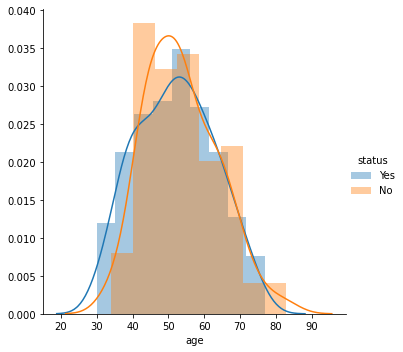

In [14]:
#Plotting the histogram on age with differant color of status 

sns.FacetGrid(haber,hue='status',height=5).map(sns.distplot,'age').add_legend()
plt.show()

No major findings, Only thing I can see during early age chances of survival is more

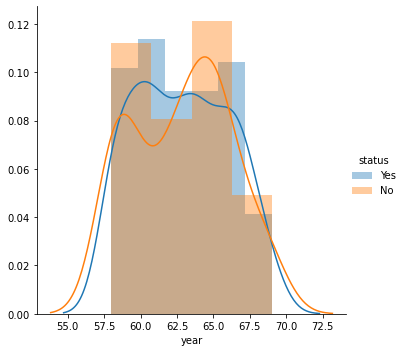

In [15]:
#Plotting the histogram on year with differant color of status

sns.FacetGrid(haber,hue='status',height=5).map(sns.distplot,'year').add_legend()
plt.show()

No major findings.

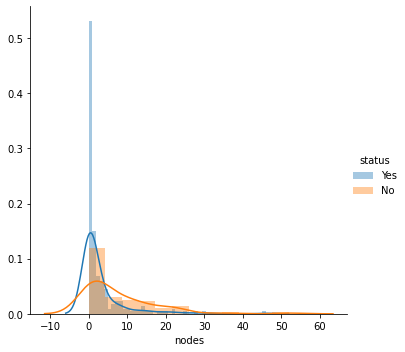

In [16]:
#Plotting the histogram on nodes with differant color of status 

sns.FacetGrid(haber,hue='status',height=5).map(sns.distplot,'nodes').add_legend()
plt.show()

From the Graph it is clearly visible chances of survival at node 0 is higher and as nodes are getting increases, 
chances of survival is decreasing.

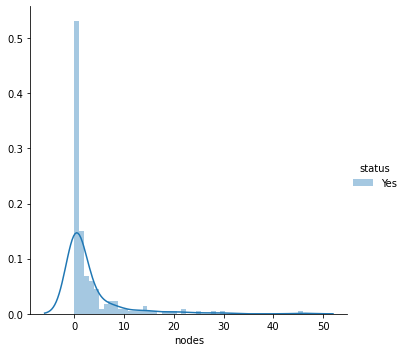

In [17]:
#Plotting the histogram on nodes with differant color of status for success dataframe 

sns.FacetGrid(Success_haber,hue='status',height=5).map(sns.distplot,'nodes').add_legend()
plt.show()

From the Graph it is clearly visible Chances of survival at node 0 is higher.

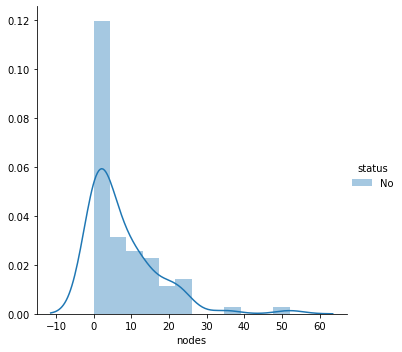

In [18]:
sns.FacetGrid(Failure_haber,hue='status',height=5).map(sns.distplot,'nodes').add_legend()
plt.show()

As nodes are getting inceses chances of survival is getting less.

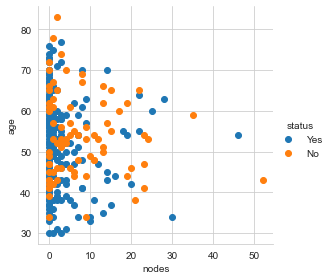

In [19]:
#Plotting Scatter plot of nodes and age for differant status.

sns.set_style("whitegrid");
sns.FacetGrid(haber, hue="status", size=4) \
   .map(plt.scatter, "nodes", "age") \
   .add_legend();
plt.show();

From the Graph it is visible Chances of survival at node 0 is more.

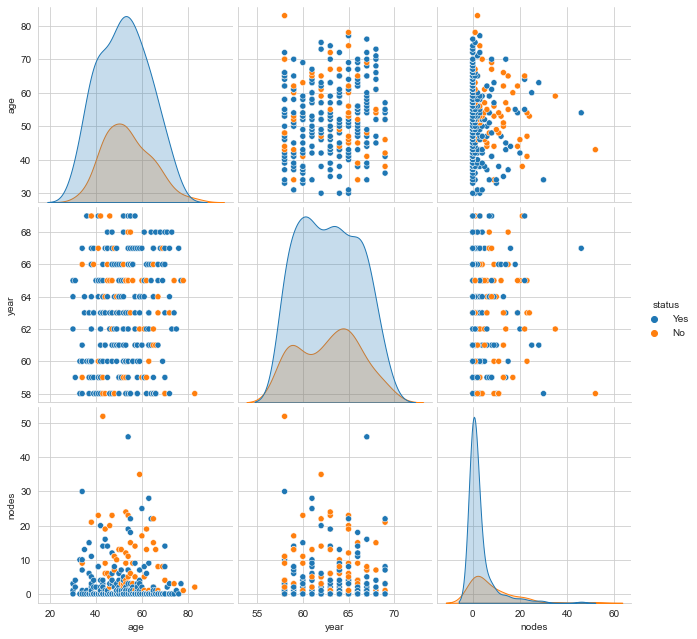

In [20]:
#Ploting pair plot

sns.set_style("whitegrid")
sns.pairplot(haber,hue='status',size=3)
plt.show()

Only graph which gives some idea is age vs nodes.

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


Text(0.5, 0, 'nodes')

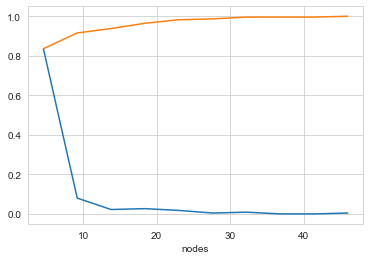

In [21]:
#Simple form to plot CDF
#sns.kdeplot(haber,cumulative=True)

#plotting PDF and CDF for Nodes for Success dataframes
counts, bin_edges = np.histogram(Success_haber['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf, label = 'Yes')
plt.xlabel('nodes')


Analysis:82% survival when nodes is less then 4.

[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


Text(0.5, 0, 'nodes')

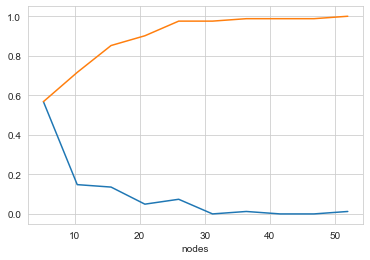

In [22]:
#plotting PDF and CDF for Nodes for Failure dataframe.

counts, bin_edges = np.histogram(Failure_haber['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf, label = 'No')
plt.xlabel('nodes')

Failure is at peak ie chances of survial is none, when nodes are more than 30

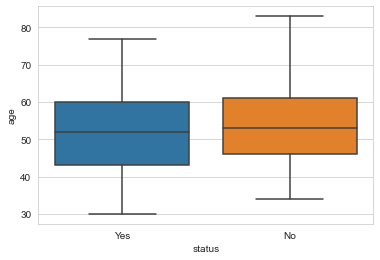

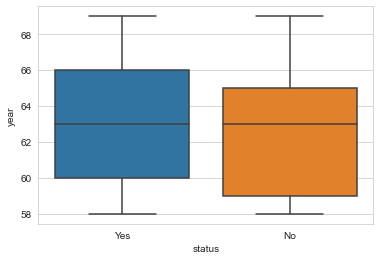

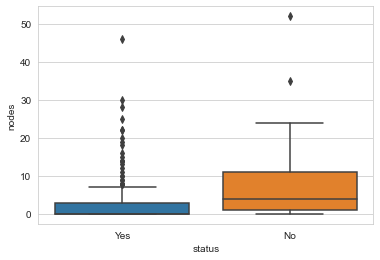

In [23]:
#Plotting box plot

sns.boxplot(x='status',y='age',data=haber)
plt.show()

sns.boxplot(x='status',y='year',data=haber)
plt.show()

sns.boxplot(x='status',y='nodes',data=haber)
plt.show()

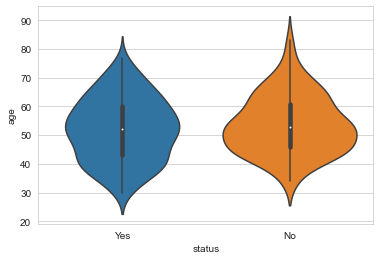

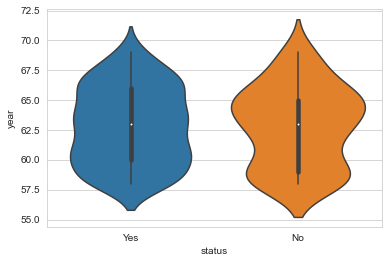

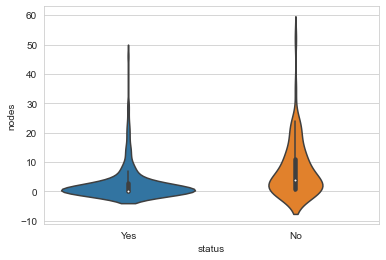

In [24]:
#violinplot 

sns.violinplot(x='status',y='age',data = haber, height = 10)
plt.show()

sns.violinplot(x='status',y='year',data = haber, height = 10)
plt.show()

sns.violinplot(x='status',y='nodes',data = haber, height = 10)
plt.show()

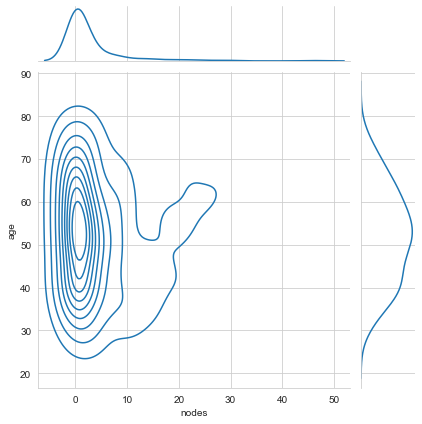

In [25]:
#Jont plot for sucess dataframe

sns.jointplot(x = 'nodes', y = 'age', data = Success_haber, kind = 'kde')
plt.show()

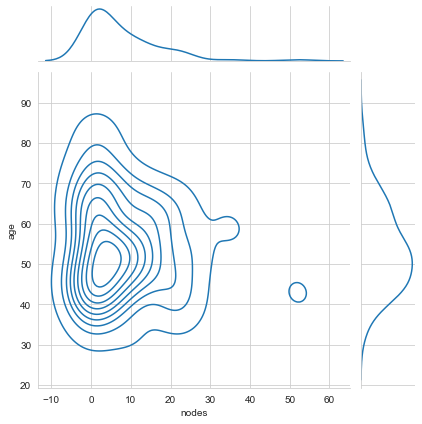

In [26]:
#Joint plot for failure data frame

sns.jointplot(x = 'nodes', y = 'age', data = Failure_haber, kind = 'kde')
plt.show()

<b>Conclusion: </b> 
1) Nodes is the very important feature for feguring out Cancer Analysis.<br>
2) If you reduce or control the nodes, chances of survival from cancer is more.<br> 
3) Patient’s age and operation year alone are not deciding factors for his/her survival. Yet, people less than 35 years have more chance of survival.<br>
4) The objective of classifying the survival status of a new patient based on the given features is a difficult task as the data is imbalanced.